<a href="https://colab.research.google.com/github/NaumanAnwar97/KNN-Classification/blob/main/KNN_ClassificationAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN CLassification

## Nauman Anwar
## 22I-0123

### ML Lab

In [12]:
# Import Libraries
import pandas as pd

import numpy as np

import sklearn


In [13]:
df = pd.read_csv("/content/Diabetes_Dataset - Diabetes_Dataset.csv")

df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [14]:
df = df.drop('ID', axis =1)

In [15]:
df.shape

(1000, 13)

In [16]:
# find the null values counts in eac
print(f'The null values in each column are {df.isnull().sum()}')

The null values in each column are No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [17]:
print(f'Unique classes count are {df["CLASS"].value_counts()}')
print(f'Total count: {df["CLASS"].value_counts().sum()}')

Unique classes count are Y    844
N    103
P     53
Name: CLASS, dtype: int64
Total count: 1000


In [18]:
features = df[['No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI']]
target = df['CLASS']

In [37]:
# Converting the string to lower
df['Gender'] = df['Gender'].str.lower()
df['CLASS'] = df['CLASS'].str.lower()
df['CLASS'] = df['CLASS'].str.strip()

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
features['Gender_encoded'] = encoder.fit_transform(features['Gender'])
le_gender_mapping = dict(zip( encoder.transform(encoder.classes_),encoder.classes_))
print(le_gender_mapping)
target_encoded = encoder.fit_transform(target)
le_class_mapping = dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
print(le_class_mapping)

{0: 'F', 1: 'M', 2: 'f'}
{0: 'N', 1: 'P', 2: 'Y'}


In [21]:
numerical_features = features.drop('Gender', axis=1)

In [22]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numerical_features, target_encoded, test_size=0.2, random_state=42, stratify=target_encoded)
# print unique vaulues count in y_train and y_test numpy array
# count of unique values in y_train
print(np.unique(y_train, return_counts=True))
# count of unique values in y_test
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([ 82,  43, 675]))
(array([0, 1, 2]), array([ 21,  10, 169]))


In [23]:
from sklearn.base import ClassifierMixin

In [24]:
# Applying KNeighbourClassifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [25]:
y_pred = neigh.predict(X_test)

In [34]:
X_test.head(5)

,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_encoded
119,87674,50,4.3,59,6.1,4.0,3.0,1.0,1.8,1.3,24.0,1
92,45406,60,7.5,70,0.9,3.4,5.3,1.1,3.6,0.8,24.0,0
157,23977,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
504,20098,51,4.9,56,7.7,3.0,0.3,1.3,1.5,0.1,30.0,1
21,12744,42,5.0,73,4.5,6.2,1.0,1.1,4.6,0.4,24.0,0


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

Accuracy: 90.0 %


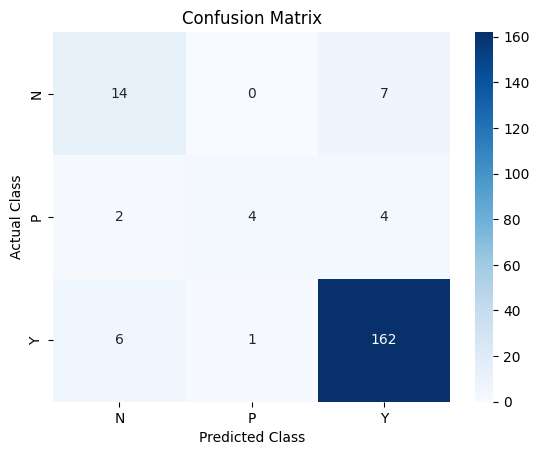

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

cm  = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(cm, index=le_class_mapping.values(), columns=le_class_mapping.values())
# plot the confusion metrix using seaborn
sns.heatmap(confusion_matrix_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

In [42]:
## Predicting New Patient
observ = [[27975,30, 7.4, 46, 9.4, 1.2, 9.0, 4.2, 4.1, 5.0, 42,1]]


def Patient_Status(X):
  New_pred = neigh.predict(X)
  if New_pred == 2:
    print("Yes, the person is Diabetic.")
  else:
    print("No, the person is not Diabetic.")

Patient_Status(observ)

Yes, the person is Diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
